# **Assignment 10**
## Julian Adames-Ng

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [ ]:
# Load datasets here once and assign to variables iris and boston

iris = ds.load_iris()


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
def e2(new_observations):

  X = iris.data
  y = iris.target
  y_class = iris.target_names

# Create a KNN classifier with 6 neighbors
  knn = KNeighborsClassifier(n_neighbors = 5)

# Fit the classifier to the data
  knn.fit(X, y)

  y_pred = knn.predict(new_observations)

# Replace index with class names
  iris_predictions = [y_class[i] for i in y_pred]

# Return the class name predictions
  return iris_predictions

**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:
from sklearn import metrics

def e3(neighbors, split):
    # load the iris data
    iris = ds.load_iris()

    # Get X, y and the class names
    X = iris.data
    y = iris.target
    y_class = iris.target_names

    # Split the data into train and test using the split variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=4)

    # Create a new KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    # Fit the train data in the KNN Classifier
    knn.fit(X_train, y_train)

    # Generate predictions on the test set
    y_pred = knn.predict(X_test)

    # Return the accuracy of the model
    return metrics.accuracy_score(y_test, y_pred)

# Loading data to pass new_observations to exercise02 method
iris = ds.load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)



print('Predictions: \n', e2(X_test))
print('Accuracy: ', e3(2, 0.6))

Predictions: 
 ['virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica']
Accuracy:  0.9444444444444444


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

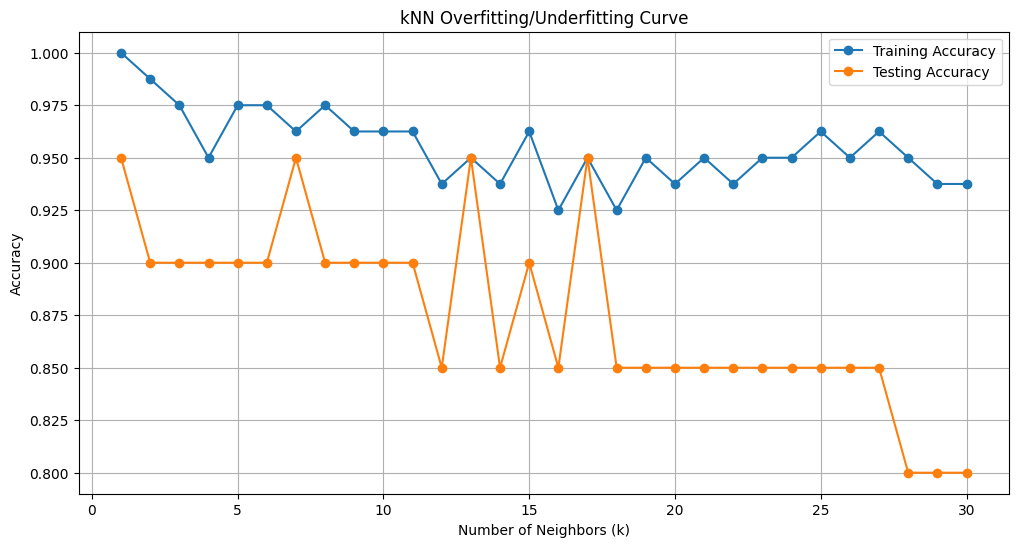

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Example data (comment the above lines if you have your own data)
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables
k_values = np.arange(1, 31)
train_accuracy = []
test_accuracy = []

# Iterate over different values of k
for k in k_values:
    # Create kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Predictions on training and testing sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy and append to the lists
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot the curves
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('kNN Overfitting/Underfitting Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()